In [14]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline
plt.style.use('seaborn')

In [2]:
boston = load_boston()
df = pd.DataFrame(
    data=boston.data,
    columns=boston.feature_names
)
df['MEDV'] = boston.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
X = df[['LSTAT']]
y = df['MEDV']

In [10]:

sgd_lr_stat = linear_model.SGDRegressor(random_state=42)
sgd_lr_stat.fit(X, y)

SGDRegressor(random_state=42)

In [11]:
print(f'w0: {sgd_lr_stat.intercept_}')
print(f'w1: {sgd_lr_stat.coef_}')

w0: [34.33010969]
w1: [-0.96193242]


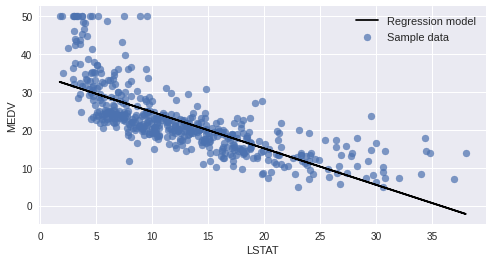

In [13]:
#функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.scatter(X, y_true, alpha=0.7, label='Sample data')
    ax.plot(X, y_predict, color='black', label='Regression model')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(facecolor='white', fontsize=11)

#Предсказывае медианную цену для всех участников из набора данных   
y_predict = sgd_lr_stat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [15]:
print(f'R2 score: {round(metrics.r2_score(y, y_predict), 3)}')

R2 score: 0.542


In [16]:
#Составляем список факторов (исключили целевой столбец)
features = df.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = df[features]
y = df['MEDV']

#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)

#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'coef': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': 'INTERCEPT', 'coef': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df


,Features,coef
0,CRIM,-5.906323e+11
1,ZN,9.939534e+10
2,INDUS,-2.643548e+11
3,CHAS,-7.581326e+10
4,NOX,-6.056499e+09
5,RM,7.721585e+10
6,AGE,-1.566358e+11
7,DIS,2.345020e+11
8,RAD,-4.036876e+11
9,TAX,-2.362682e+11


In [17]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print(f'R2 score: {round(metrics.r2_score(y, y_predict), 3)}')

R2 score: -5.120746763943001e+25


In [18]:
from sklearn import preprocessing

#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
x_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
x_scaled = pd.DataFrame(x_scaled, columns=features)
x_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [19]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(x_scaled, y)

#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'coef': sgd_lr_full.coef_})
intercept_df = pd.DataFrame({'Features': 'INTERCEPT', 'coef': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df


,Features,coef
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [20]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(x_scaled)
print(f'R2 score: {round(metrics.r2_score(y, y_predict), 3)}')

R2 score: 0.74


In [21]:
sgd_lr_bad = linear_model.SGDRegressor(learning_rate='constant', eta0=0.1, random_state=42)
sgd_lr_bad.fit(x_scaled, y)

y_predict = sgd_lr_bad.predict(x_scaled)
print(f'r2 score: {round(metrics.r2_score(y, y_predict), 3)}')

r2 score: -335415038359.635


In [22]:
sgd_lr_alpha = linear_model.SGDRegressor(alpha=0.1, random_state=42)
sgd_lr_alpha.fit(x_scaled, y)
y_predict = sgd_lr_alpha.predict(x_scaled)
print(f'r2 score: {round(metrics.r2_score(y, y_predict), 3)}')

r2 score: 0.731
